# Tabular methods

## Sarsa-lambda comparison

In [1]:
%matplotlib inline

import gym
import numpy as np
import matplotlib.pyplot as plt

from math_utils import constant, exp_decay, harmonic_sequence, epsilon_greedy, softmax_policy, moving_avg
from tabular import train_with_plots, sarsa, sarsa_lambda


action size = 4
state size = 48


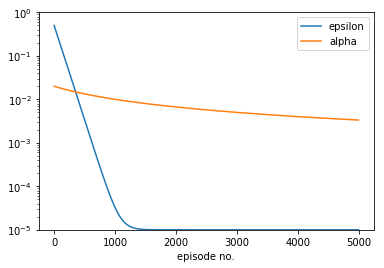

In [2]:
env = gym.make('CliffWalking-v0')

state_size = env.observation_space.n
action_size = env.action_space.n

print(f'action size = {action_size}')
print(f'state size = {state_size}')

max_eps = int(5e3)
alpha = harmonic_sequence(2e-2, 1e-3, 1e-5)
epsilon = exp_decay(0.5, 0.01, 1e-5)
gamma = 1.0
policy = epsilon_greedy(epsilon)

sarsa_episode_fn = sarsa(policy, gamma, alpha)

lambda_ = 0.5
sarsa_lambda_episode_fn = sarsa_lambda(policy, gamma, alpha, lambda_)

# Optimistic initialisation
Q_initial = 0.0 * np.ones((state_size, action_size), np.float64)

x = np.arange(max_eps)
plt.yscale('log')
plt.ylim([1e-5, 1])
plt.xlabel('episode no.')
plt.plot(x, np.vectorize(epsilon)(x), label='epsilon')
plt.plot(x, np.vectorize(alpha)(x), label='alpha')
plt.legend();

 5000: -13.149

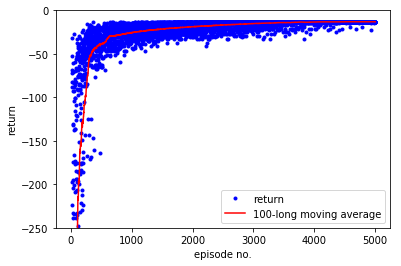

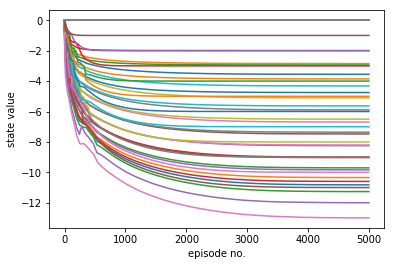

In [3]:
sarsa_returns, sarsa_tracks = train_with_plots(env, sarsa_episode_fn, Q_initial, max_eps, steps_per_log=100,
                                               value_range=[-250, 0])

 5000: -13.044

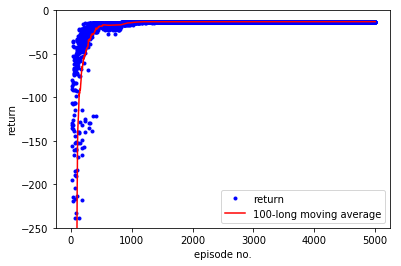

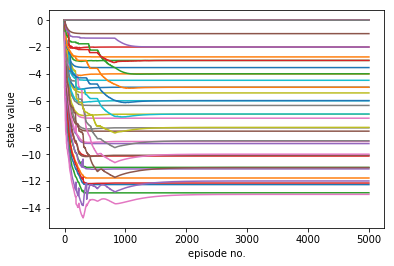

In [4]:
sarsa_lambda_returns, sarsa_lambda_tracks = train_with_plots(env, sarsa_lambda_episode_fn, Q_initial, max_eps, 
                                                             steps_per_log=100, value_range=[-250, 0])

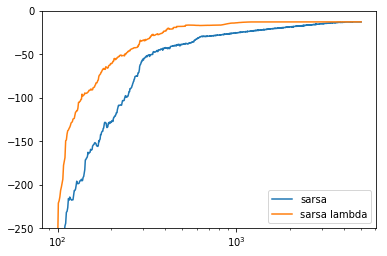

In [5]:
avg1_x, avg1 = moving_avg(100, sarsa_returns)
avg2_x, avg2 = moving_avg(100, sarsa_lambda_returns)

plt.figure()
plt.xscale('log')
plt.ylim([-250, 0])
plt.plot(avg1_x, avg1, label='sarsa')
plt.plot(avg2_x, avg2, label='sarsa lambda')
plt.legend()
